# **Detección de Anomalías: Conceptos y Aplicación Práctica**

## **¿Qué es la Detección de Anomalías?**

La detección de anomalías (también conocida como detección de outliers o valores atípicos) es el proceso de identificar puntos de datos, eventos u observaciones que se desvían significativamente del comportamiento esperado o de la "norma" en un conjunto de datos. Estos puntos anómalos pueden indicar problemas críticos, oportunidades o rarezas, como fraudes, fallas en equipos, enfermedades raras o errores en la recolección de datos.

En el contexto del aprendizaje no supervisado, la detección de anomalías se realiza sin etiquetas previas que indiquen qué observaciones son normales y cuáles son anómalas. El algoritmo debe aprender la estructura de los datos "normales" y luego identificar aquellos puntos que no se ajustan a esa estructura.

---

## **¿Por qué puede ser importante?**

- **Detección de Enfermedades Raras:** Identificar pacientes con patrones de biomarcadores o síntomas que no encajan con enfermedades conocidas, lo que podría indicar una condición rara o un nuevo subtipo.

- **Farmacovigilancia:** Detectar reacciones adversas a medicamentos que son inesperadas o ocurren con una frecuencia inusual.

- **Monitoreo de Pacientes:** Identificar cambios abruptos o inusuales en los signos vitales o datos de sensores de un paciente que podrían indicar un evento médico crítico.

- **Control de Calidad de Datos:** Localizar errores en la entrada de datos genómicos, resultados de laboratorio o registros clínicos.

- **Análisis de Imágenes Médicas:** Detectar anomalías estructurales en imágenes (radiografías, resonancias magnéticas) que podrían ser indicativas de tumores, lesiones, o patologías.

---

## **Tipos de Anomalías**

- **Puntuales (Point Anomalies):** Una sola instancia de dato es anómala respecto al resto del conjunto.  
  *Ejemplo:* La lectura de glucosa de un paciente es extremadamente alta en un momento dado.

- **Contextuales (Contextual Anomalies):** Una instancia de dato es anómala solo en un contexto específico.  
  *Ejemplo:* La temperatura corporal de 37°C es normal, pero 37°C después de estar en una cámara frigorífica extrema podría ser anómalo.

- **Colectivas (Collective Anomalies):** Un conjunto de instancias de datos es anómalo en su conjunto, aunque las instancias individuales pueden no ser anómalas.  
  *Ejemplo:* Un patrón de actividad neuronal que, individualmente, parece normal, pero su secuencia temporal o espacial combinada es inusual.

---

## **Algoritmos Comunes para Detección de Anomalías**

### **Basados en Densidad (Density-Based):**

- **Local Outlier Factor (LOF):** Mide la densidad de un punto en relación con la densidad de sus vecinos. Un punto es una anomalía si es significativamente menos denso que sus vecinos.

- **Isolation Forest (Bosque de Aislamiento):** Algoritmo ensemble que aísla anomalías construyendo árboles de decisión aleatorios. Las anomalías requieren menos cortes para aislarse.

- **One-Class SVM:** Entrena un límite para separar la "clase normal" de todo lo demás. Los puntos fuera de este límite son anomalías.

### **Basados en Distancia (Distance-Based):**

- **k-Nearest Neighbors (k-NN):** Un punto es anómalo si su distancia al k-ésimo vecino más cercano es significativamente mayor.

### **Basados en Modelos (Model-Based):**

- **Gaussian Mixture Models (GMM):** Modela la distribución normal con una mezcla de Gaussianas. Puntos con baja probabilidad de pertenencia son anomalías.

---

## **Ejercicio Práctico: Detección de Anomalías con Isolation Forest**

Utilizaremos el algoritmo Isolation Forest debido a su eficiencia y efectividad para detectar anomalías en datasets multidimensionales.

**Escenario:**

Imagina que estás monitoreando los resultados de un análisis sanguíneo (dos biomarcadores, por simplicidad) en un grupo de pacientes. La mayoría de los pacientes tienen resultados dentro de rangos normales, pero un pequeño grupo presenta valores atípicos que podrían indicar una condición subyacente rara o un error en la muestra.


Contaminación real del dataset de ejemplo: 0.048


/tmp/ipython-input-1-965568236.py:74: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red', linestyles='--', label='Límite de Decisión')


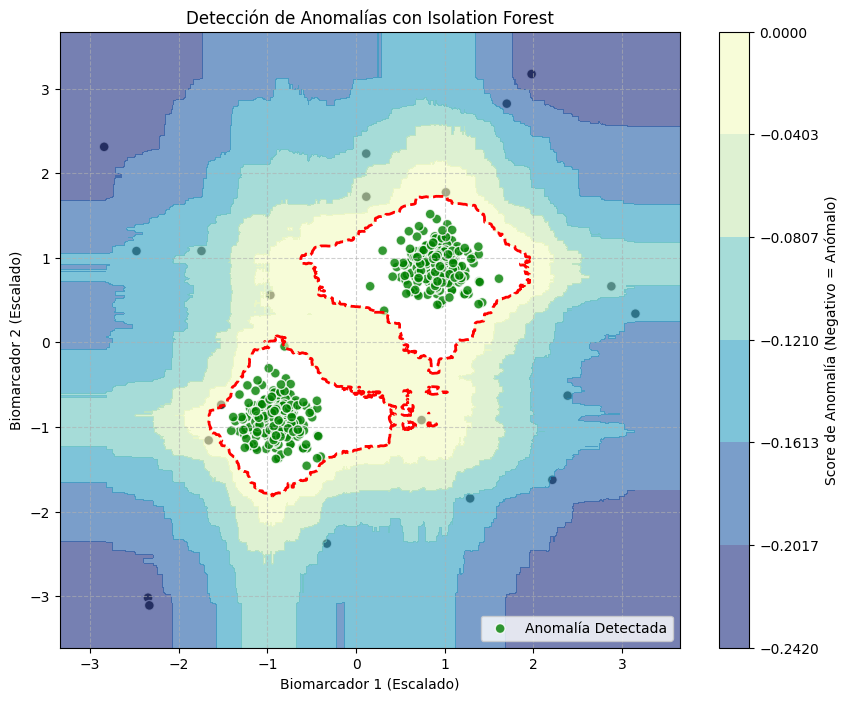


Total de muestras: 420
Número de anomalías detectadas: 20
Número de puntos normales detectados: 400

Los 5 puntos con los scores de anomalía más bajos (más anómalos):
  Punto 401: Valores = [-6.21074305  5.10611327], Score de Anomalía = -0.221
  Punto 418: Valores = [-5.09079934 -6.79637468], Score de Anomalía = -0.220
  Punto 415: Valores = [-5.1237868  -6.59704253], Score de Anomalía = -0.217
  Punto 402: Valores = [4.38061413 6.99604743], Score de Anomalía = -0.215
  Punto 404: Valores = [3.76582381 6.22672022], Score de Anomalía = -0.181


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# --- 1. Generar Datos de Ejemplo ---
# Datos normales: Cluster de puntos centrados alrededor de un valor.
# Simulemos dos biomarcadores
np.random.seed(42) # Para reproducibilidad

# Pacientes "normales"
X_normal = 0.5 * np.random.randn(200, 2)
X_normal = np.r_[X_normal + [2, 2], X_normal + [-2, -2]] # Dos grupos normales

# Anomalías: Un pequeño número de puntos muy alejados.
X_anomalies = np.random.uniform(low=-7, high=7, size=(20, 2)) # 20 puntos anómalos

# Combinar datos normales y anómalos
X_combined = np.r_[X_normal, X_anomalies]

# --- 2. Preprocesamiento: Escalar los datos ---
# El escalado es importante para muchos algoritmos de detección de anomalías
# que se basan en distancias o en la dispersión de los datos.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_combined)

# --- 3. Aplicar Isolation Forest ---
# n_estimators: número de árboles en el bosque
# contamination: la proporción esperada de anomalías en el dataset.
#                Es un hiperparámetro importante; si no se conoce, se puede probar un valor bajo (ej. 0.01, 0.05, 0.1).
#                Aquí lo conocemos (20 anomalías en 420 puntos ~ 0.047), pero lo simularemos sin conocerlo
#                para mostrar un uso más general. Si no se especifica, usa un valor heurístico o se asume 0.1.

# Estimaremos la contaminación para este ejemplo
num_anomalies_true = len(X_anomalies)
total_samples = len(X_combined)
estimated_contamination = num_anomalies_true / total_samples
print(f"Contaminación real del dataset de ejemplo: {estimated_contamination:.3f}")

# Inicializamos el modelo
# Establecemos random_state para resultados reproducibles
model = IsolationForest(n_estimators=100, contamination=estimated_contamination, random_state=42)

# Entrenar el modelo (aprender la estructura de los datos normales)
model.fit(X_scaled)

# Predecir si cada punto es una anomalía (-1 para anomalía, 1 para normal)
predictions = model.predict(X_scaled)

# Obtener los scores de anomalía (un score más bajo indica más anomalía)
# El score es negativo para outliers y positivo para inliers.
# Es útil para clasificar o rankear los puntos por su 'anomalía'.
anomaly_scores = model.decision_function(X_scaled)

# --- 4. Visualización de Resultados ---
plt.figure(figsize=(10, 8))

# Scatter plot de los puntos de datos
# Color en base a la predicción de anomalía
# Negro para anomalías (-1), verde para normales (1)
colors = np.array(['black', 'green']) # -1 es negro (anomalía), 1 es verde (normal)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=colors[(predictions + 1) // 2], s=50, alpha=0.8, edgecolors='w')

# Opcional: Para visualizar la función de decisión (scores de anomalía)
# Esto crea un mapa de calor que muestra las regiones de alta y baja anomalía
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min() - 0.5, X_scaled[:, 0].max() + 0.5, 500),
                     np.linspace(X_scaled[:, 1].min() - 0.5, X_scaled[:, 1].max() + 0.5, 500))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.YlGnBu_r, alpha=0.6)
plt.colorbar(label='Score de Anomalía (Negativo = Anómalo)')
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red', linestyles='--', label='Límite de Decisión')


plt.title('Detección de Anomalías con Isolation Forest')
plt.xlabel('Biomarcador 1 (Escalado)')
plt.ylabel('Biomarcador 2 (Escalado)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(['Anomalía Detectada', 'Normal Detectado', 'Límite de Decisión'], loc='lower right', frameon=True)
plt.show()

# --- 5. Análisis de Resultados ---
# Imprimir cuántas anomalías se detectaron
num_detected_anomalies = np.sum(predictions == -1)
num_detected_normal = np.sum(predictions == 1)

print(f"\nTotal de muestras: {total_samples}")
print(f"Número de anomalías detectadas: {num_detected_anomalies}")
print(f"Número de puntos normales detectados: {num_detected_normal}")

# Identificar los puntos que el modelo clasificó como anomalías
outlier_indices = np.where(predictions == -1)[0]
# print(f"\nÍndices de los puntos clasificados como anomalías: {outlier_indices}")

# Mostrar los 5 puntos con los scores de anomalía más bajos (más anómalos)
sorted_anomaly_indices = np.argsort(anomaly_scores)[:5]
print("\nLos 5 puntos con los scores de anomalía más bajos (más anómalos):")
for idx in sorted_anomaly_indices:
    print(f"  Punto {idx}: Valores = {X_combined[idx]}, Score de Anomalía = {anomaly_scores[idx]:.3f}")

# **Explicación del Código**

**Generación de Datos:**  
Creamos un conjunto de datos bidimensional con dos grupos "normales" y un pequeño conjunto de puntos "anómalos" distribuidos aleatoriamente fuera de estos grupos.

**Preprocesamiento:**  
Se utiliza `StandardScaler` para estandarizar los datos. Esto es fundamental para algoritmos basados en distancia o en la varianza, ya que asegura que todas las características contribuyan equitativamente al cálculo de la "normalidad" o "anomalía".

**Aplicación de Isolation Forest:**

- `IsolationForest()`: Inicializamos el modelo.

- `n_estimators`: El número de árboles de aislamiento que se construirán. Un valor más alto generalmente mejora la robustez, pero aumenta el tiempo de computación.

- `contamination`: Este es un hiperparámetro crucial. Es la proporción esperada de anomalías en el conjunto de datos. Si no tienes un conocimiento previo de esta proporción, elegir un valor pequeño y conservador (ej. 0.01 o 0.05) suele ser un buen punto de partida. Si se conoce la proporción real, como en nuestro ejemplo simulado, usarla directamente ayudará al modelo a establecer un umbral adecuado.

- `fit(X_scaled)`: El modelo aprende la estructura de los datos normales.

- `predict(X_scaled)`: Devuelve -1 para los puntos clasificados como anomalías y 1 para los normales.

- `decision_function(X_scaled)`: Devuelve un "score de anomalía" para cada punto. Cuanto más bajo (más negativo) sea este score, más anómalo se considera el punto. El umbral para clasificar un punto como anomalía o normal se basa en el parámetro `contamination`.

**Visualización:**  
Se genera un gráfico de dispersión donde los puntos se colorean según la predicción del modelo (normal o anómalo). Además, se muestra el "límite de decisión" y las regiones de score de anomalía para entender cómo el modelo diferencia entre lo normal y lo atípico.

**Análisis de Resultados:**  
Se cuenta el número de anomalías detectadas y se muestran los puntos con los scores de anomalía más bajos, que son los que el modelo considera más inusuales.

---

Este ejercicio te permite ver cómo un algoritmo de detección de anomalías puede identificar automáticamente patrones inusuales en tus datos, lo cual es de gran valor en campos donde las anomalías son raras pero críticas.
